In [ ]:
### EDA Pkgs
import pandas as pd

In [ ]:
# Data Viz Pkg
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Dataset

df = pd.read_csv("/covid19_tweets.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Preview
df.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites user_verified  \
0           624.0         950.0          18775.0         False   
1          2253.0        1677.0             24.0          True   
2          9275.0        9525.0           7254.0         False   
3           197.0         987.0           1488.0         False   
4        101009.0         168.0            101.0         False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source is_retweet  
0                                NaN   Twitter for iPhone      False  
1                                NaN  Twitter for Android      False  
2                        ['COVID19']  Twitter for Android      False  
3                        ['COVID19']   Twitter for iPhone      False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android      False

#### Task
+ Text
    - Text Preprocessing
    - Sentiment Analysis
    - Keyword Extraction
    - Entity Extraction

In [ ]:
# Check Columns
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [ ]:
# Datatype
df.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends        float64
user_favourites     float64
user_verified        object
date                 object
text                 object
hashtags             object
source               object
is_retweet           object
dtype: object

In [ ]:
# Source/ Value Count/Distribution of the Sources
df['source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Buffer', 'TweetDeck', 'Twitter for iPad', 'Africa Newsroom',
       'Blood Donors India', 'TweetCaster for Android',
       'Alexander Higgins', 'IFTTT', 'Hootsuite Inc.', 'Sprout Social',
       'Sprinklr', 'assarofficial', 'IAMBLOG2TWITTER', 'CrowdControlHQ',
       'COVID19-Updates', 'EveryoneSocial', 'Dynamic Signal', 'Instagram',
       'TweetCaster for iOS', 'GlobalPandemic.NET', 'Venrap Radio',
       'HeyOrca', 'Twitter for Advertisers', 'Paper.li',
       'Twitter Media Studio', 'Twitter for Mac', 'dlvr.it',
       'Cheap Bots, Done Quick!', 'Prof. Shanku', 'LaterMedia',
       'SEMrush Social Media Tool', 'Twitterrific for iOS',
       "Sebastian's Twitter Bot", 'Threader_client', 'COVID19FactoidBot',
       'PwC UK SMART', 'tweet pro stiff', 'UK COVID-19 Alerts',
       'Resistbot Open Letters', 'preprint-alert', 'ContentStudio.io',
       'Peeping Moon', 'TweetAutomaticos', 'Orlo', 'AgoraPulse Ma

In [ ]:
# Source/ Value Count/Distribution of the Sources
df['source'].value_counts()

Twitter Web App                    3085
Twitter for Android                2864
Twitter for iPhone                 2093
TweetDeck                           604
Hootsuite Inc.                      330
                                   ... 
Social Genie by Brighter Vision       1
SocialChamp IO                        1
covid19_tracker                       1
Threat Intel Hub                      1
PromoRepublic                         1
Name: source, Length: 201, dtype: int64

In [ ]:
# Plot the top value_counts
df['source'].value_counts().nlargest(30)

Twitter Web App            3085
Twitter for Android        2864
Twitter for iPhone         2093
TweetDeck                   604
Hootsuite Inc.              330
Twitter for iPad            263
IFTTT                       143
Buffer                      123
Instagram                   104
Sprout Social                66
COVID19-Updates              53
dlvr.it                      52
FS Poster                    49
Twitter Media Studio         44
LinkedIn                     39
Fabrik.fm                    34
GlobalPandemic.NET           34
WordPress.com                33
Paper.li                     33
preprint-alert               27
Prof. Shanku                 27
assarofficial                26
Dynamic Signal               23
Flamingo for Android         23
Blood Donors India           23
SocialPilot.co               23
Sprinklr                     22
Orlo                         21
Cheap Bots, Done Quick!      21
Twitter for Advertisers      20
Name: source, dtype: int64

<Axes: >

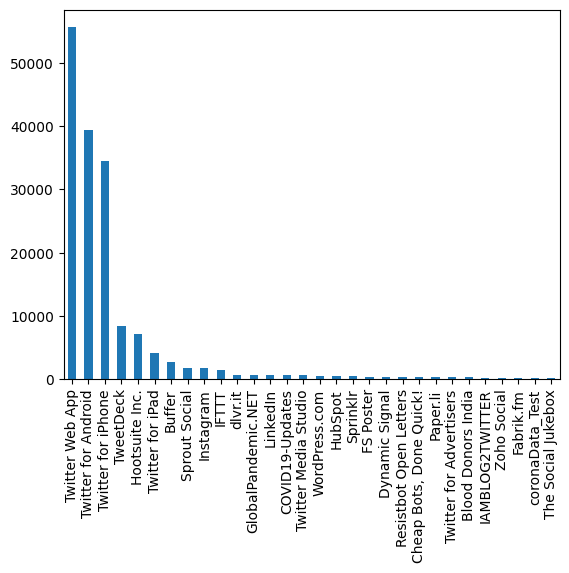

In [ ]:
# Plot the top value_counts
df['source'].value_counts().nlargest(30).plot(kind='bar')

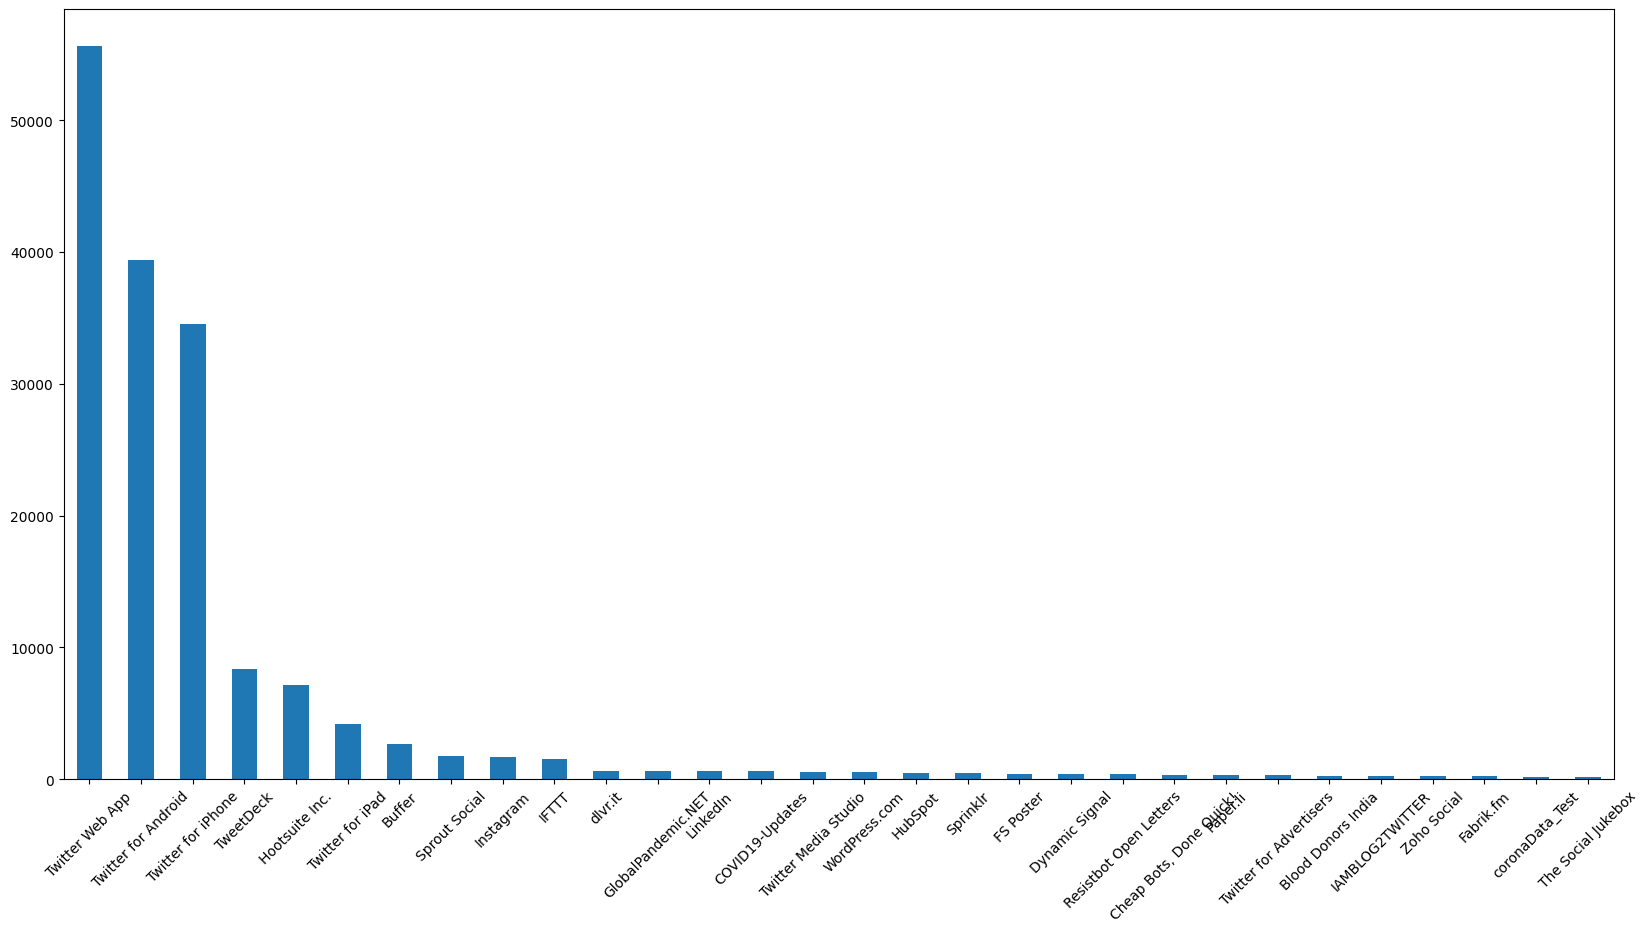

In [ ]:
# Plot the top value_counts
plt.figure(figsize=(20,10))
df['source'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

#### Text Analysis of tweet

In [ ]:
pip install neattext

In [ ]:
# Load Text Cleaning Package
import neattext.functions as nfx

In [ ]:
# Methods/Attrib
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df['text'].iloc[2]

'@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3'

### Noise
+ remove mentions/userhandles
+ remove hashtags
+ urls
+ emojis
+ special char

In [ ]:
df.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites user_verified  \
0           624.0         950.0          18775.0         False   
1          2253.0        1677.0             24.0          True   
2          9275.0        9525.0           7254.0         False   
3           197.0         987.0           1488.0         False   
4        101009.0         168.0            101.0         False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source is_retweet  
0                                NaN   Twitter for iPhone      False  
1                                NaN  Twitter for Android      False  
2                        ['COVID19']  Twitter for Android      False  
3                        ['COVID19']   Twitter for iPhone      False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android      False

In [ ]:
df['text'].apply(lambda x: nfx.extract_hashtags(str(x)))

0                                      []
1                                      []
2                              [#COVID19]
3                              [#COVID19]
4         [#CoronaVirusUpdates, #COVID19]
                       ...               
174900                                 []
174901               [#AmericanGenocide…]
174902           [#COVID19, #COVIDIDIOTS]
174903                                 []
174904                                 []
Name: text, Length: 174905, dtype: object

In [ ]:
df['extracted_hashtags'] = df['text'].apply(lambda x: nfx.extract_hashtags(str(x)))

In [ ]:
df[['extracted_hashtags','hashtags']]

extracted_hashtags                           hashtags
0                                    []                                NaN
1                                    []                                NaN
2                            [#COVID19]                        ['COVID19']
3                            [#COVID19]                        ['COVID19']
4       [#CoronaVirusUpdates, #COVID19]  ['CoronaVirusUpdates', 'COVID19']
...                                 ...                                ...
174900                               []                                NaN
174901             [#AmericanGenocide…]               ['AmericanGenocide']
174902         [#COVID19, #COVIDIDIOTS]         ['COVID19', 'COVIDIDIOTS']
174903                               []                                NaN
174904                               []                                NaN

[174905 rows x 2 columns]

In [ ]:
# Cleaning Text
df['clean_tweet'] = df['text'].apply(lambda x: nfx.remove_hashtags(str(x)))

In [ ]:
df[['text','clean_tweet']]

text  \
0       If I smelled the scent of hand sanitizers toda...   
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
...                                                   ...   
174900  “Killing it” is the worst of puns. You are def...   
174901  @SenJoniErnst @VP FAscism never works out for ...   
174902  @calgaryherald We have everything we need in o...   
174903  Didn’t Ducey’s underage son embarrass the fami...   
174904                                                NaN   

                                              clean_tweet  
0       If I smelled the scent of hand sanitizers toda...  
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...  
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...  
3       @brookbanktv The one gift   has give me is an ...  
4       25 July : Media Bulletin on Novel     \n@kansa...  
...                                                   ...  
174900  “Killing it” is the worst of puns. You are def...  
174901  @SenJoniErnst @VP FAscism never works out for ...  
174902  @calgaryherald We have everything we need in o...  
174903  Didn’t Ducey’s underage son embarrass the fami...  
174904                                                nan  

[174905 rows x 2 columns]

In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [ ]:
df[['text','clean_tweet']]

text  \
0       If I smelled the scent of hand sanitizers toda...   
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
...                                                   ...   
174900  “Killing it” is the worst of puns. You are def...   
174901  @SenJoniErnst @VP FAscism never works out for ...   
174902  @calgaryherald We have everything we need in o...   
174903  Didn’t Ducey’s underage son embarrass the fami...   
174904                                                NaN   

                                              clean_tweet  
0       If I smelled the scent of hand sanitizers toda...  
1       Hey     and   - wouldn't it have made more sen...  
2             Trump never once claimed   was a hoax. W...  
3         The one gift   has give me is an appreciatio...  
4       25 July : Media Bulletin on Novel     \n      ...  
...                                                   ...  
174900  “Killing it” is the worst of puns. You are def...  
174901      FAscism never works out for the people \nB...  
174902    We have everything we need in our bodies to ...  
174903  Didn’t Ducey’s underage son embarrass the fami...  
174904                                                nan  

[174905 rows x 2 columns]

In [ ]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from \n      cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [ ]:
# Cleaning Text: Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [ ]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [ ]:
# Cleaning Text : Remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [ ]:
# Cleaning Text: Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [ ]:
df[['text','clean_tweet']]

text  \
0       If I smelled the scent of hand sanitizers toda...   
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
...                                                   ...   
174900  “Killing it” is the worst of puns. You are def...   
174901  @SenJoniErnst @VP FAscism never works out for ...   
174902  @calgaryherald We have everything we need in o...   
174903  Didn’t Ducey’s underage son embarrass the fami...   
174904                                                NaN   

                                              clean_tweet  
0       If I smelled the scent of hand sanitizers toda...  
1       Hey and  wouldnt it have made more sense to ha...  
2        Trump never once claimed was a hoax We all cl...  
3        The one gift has give me is an appreciation f...  
4                      25 July : Media Bulletin on Novel   
...                                                   ...  
174900  “Killing it” is the worst of puns You are defi...  
174901   FAscism never works out for the people Be on ...  
174902   We have everything we need in our bodies to b...  
174903  Didn’t Ducey’s underage son embarrass the fami...  
174904                                                nan  

[174905 rows x 2 columns]

### Sentiment Analysis

In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [ ]:
# Text
ex1 = df['clean_tweet'].iloc[0]

In [ ]:
get_sentiment(ex1)

{'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': 'Negative'}

In [ ]:
df['sentiment_results'] = df['clean_tweet'].apply(lambda x: get_sentiment(str(x)))

In [ ]:
df['sentiment_results']

0         {'polarity': -0.25, 'subjectivity': 0.25, 'sen...
1         {'polarity': 0.5, 'subjectivity': 0.5, 'sentim...
2         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3         {'polarity': 0.0, 'subjectivity': 0.3571428571...
4         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                                ...                        
174900    {'polarity': -0.5, 'subjectivity': 0.75, 'sent...
174901    {'polarity': 0.2857142857142857, 'subjectivity...
174902    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
174903    {'polarity': -0.5, 'subjectivity': 1.0, 'senti...
174904    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 174905, dtype: object

In [ ]:
df['sentiment_results'].iloc[0]

{'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': 'Negative'}

In [ ]:
pd.json_normalize(df['sentiment_results'].iloc[0])

polarity  subjectivity sentiment
0     -0.25          0.25  Negative

In [ ]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [ ]:
df.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites user_verified  \
0           624.0         950.0          18775.0         False   
1          2253.0        1677.0             24.0          True   
2          9275.0        9525.0           7254.0         False   
3           197.0         987.0           1488.0         False   
4        101009.0         168.0            101.0         False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source is_retweet  \
0                                NaN   Twitter for iPhone      False   
1                                NaN  Twitter for Android      False   
2                        ['COVID19']  Twitter for Android      False   
3                        ['COVID19']   Twitter for iPhone      False   
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android      False   

                extracted_hashtags  \
0                               []   
1                               []   
2                       [#COVID19]   
3                       [#COVID19]   
4  [#CoronaVirusUpdates, #COVID19]   

                                         clean_tweet  \
0  If I smelled the scent of hand sanitizers toda...   
1  Hey and  wouldnt it have made more sense to ha...   
2   Trump never once claimed was a hoax We all cl...   
3   The one gift has give me is an appreciation f...   
4                 25 July : Media Bulletin on Novel    

                                   sentiment_results  polarity  subjectivity  \
0  {'polarity': -0.25, 'subjectivity': 0.25, 'sen...     -0.25      0.250000   
1  {'polarity': 0.5, 'subjectivity': 0.5, 'sentim...      0.50      0.500000   
2  {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...      0.00      0.000000   
3  {'polarity': 0.0, 'subjectivity': 0.3571428571...      0.00      0.357143   
4  {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...      0.00      0.000000   

  sentiment  
0  Negative  
1  Positive  
2   Neutral  
3   Neutral  
4   Neutral

In [ ]:
df['sentiment'].value_counts()

Neutral     73764
Positive    72393
Negative    28748
Name: sentiment, dtype: int64

<Axes: >

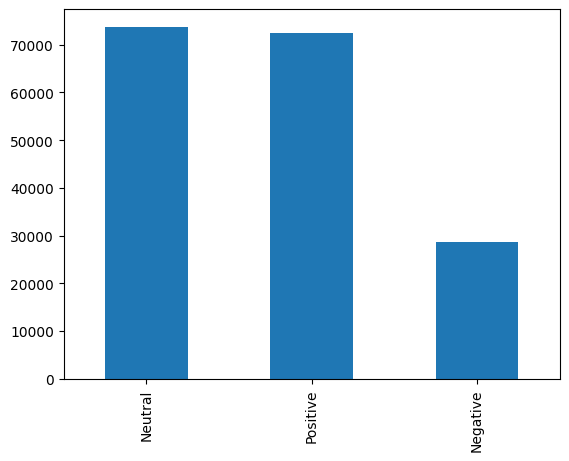

In [ ]:
df['sentiment'].value_counts().plot(kind='bar')

In [ ]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']

In [ ]:
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']

In [ ]:
positive_tweet

1         Hey and  wouldnt it have made more sense to ha...
6         How Will Change Work in General (and recruitin...
8                 Praying for good health and recovery of  
12        👋🏻 — no one will be safe from until everyone i...
13        Lets all protect ourselves from Its real and t...
                                ...                        
174885    Washington reports 1 new case bringing total c...
174890     It moot the new Abbot Labs test has still to ...
174893    A lot of dark shades in those Red states They ...
174898    More ways IoT technologies can help stop the s...
174901     FAscism never works out for the people Be on ...
Name: clean_tweet, Length: 72393, dtype: object

In [ ]:
# Remove Stopwords and Convert to Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()

In [ ]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [ ]:
positive_tweet_list

['Hey wouldnt sense players pay respects A…',
 'Change Work General (and recruiting specifically) via/',
 'Praying good health recovery',
 '👋🏻 — safe safe commit ensure…',
 'Lets protect real numbers climbing fast Continent Lets n…',
 'Second wave Flandersback',
 'COVID Update: infection rate Florida following natural curve experts predicted initial cu…',
 'Good Patriots Volunteer Election Judge Polls open without…',
 'comprehensive review amp Analysis: key ways WASH help reduce transmission…',
 'crosses 2 lakh mark 150055 ppp recovered far positive today 6988/total…',
 'Actor father MrGKReddy tested positive 15/20 days s…',
 'safe place visit guests said hotel meticulous applying hand sanitation als…',
 'CEO live WSU talking “The effects Covid19 students”…',
 'Actionables healthy recovery',
 'understood hadnt missed meeting In…',
 'released new podcast episodes week: Technology Platforms Conduct Telehealth Visits C…',
 'reports 1142 positive cases 29 deaths Saturday Death toll rises 3

In [ ]:
# Tokenization
for line in positive_tweet_list:
#     print(line)
    for token in line.split():
        print(token)

Streaming output truncated to the last 5000 lines.
infections
past
24
ho…
update:
Infections
rise
1000
University
Alabama
campus
Major
kudos
living
studio/1bdrm
apt
significant
ot…
pandemic
HF
able
work
new
countries
time
India
Covid19
Districts
30
Confirmed
Cases
(7
Days
Inc)
Pune
tops
+217K
Ahmadabad
w…
doesnt
care
live
die
racism
long
wins
That…
Hi
Julie
kindly
look
experience
Greece
records
highest
daily
coronavirus
cases:
Live
updates
READ
MORE:
hotel
quarantine
wants
know
went
right
system
👩🏽‍⚕️
Good
Job
Tetap
Solid
😍🇲🇨💪🙏
signs
wants
wear
masks
🇨🇦Thoughts
342
(AB/BC)
Canada
newly
tested
positive
families
loved
ones
o…
UK
high
street
sandwich
chain
cut
2
900
jobs
We’ve
got
live
matter
skies
fallen
Lobster
🦞
Fun
time
🌈
~
time
cleaned
phone
Download
share
image
her…
Trinidad
seeing
increase
cases
running
hospital
beds
find
t…
little
unchanged
events
2020
Virus
—
Special
Report
Cognizant
Latest
figures
Gyeonggi
Province
South
Korea
Remember
smile
(over
video
needed)
mirror
thoughts
S

In [ ]:
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]

In [ ]:
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [ ]:
pos_tokens

['Hey',
 'wouldnt',
 'sense',
 'players',
 'pay',
 'respects',
 'A…',
 'Change',
 'Work',
 'General',
 '(and',
 'recruiting',
 'specifically)',
 'via/',
 'Praying',
 'good',
 'health',
 'recovery',
 '👋🏻',
 '—',
 'safe',
 'safe',
 'commit',
 'ensure…',
 'Lets',
 'protect',
 'real',
 'numbers',
 'climbing',
 'fast',
 'Continent',
 'Lets',
 'n…',
 'Second',
 'wave',
 'Flandersback',
 'COVID',
 'Update:',
 'infection',
 'rate',
 'Florida',
 'following',
 'natural',
 'curve',
 'experts',
 'predicted',
 'initial',
 'cu…',
 'Good',
 'Patriots',
 'Volunteer',
 'Election',
 'Judge',
 'Polls',
 'open',
 'without…',
 'comprehensive',
 'review',
 'amp',
 'Analysis:',
 'key',
 'ways',
 'WASH',
 'help',
 'reduce',
 'transmission…',
 'crosses',
 '2',
 'lakh',
 'mark',
 '150055',
 'ppp',
 'recovered',
 'far',
 'positive',
 'today',
 '6988/total…',
 'Actor',
 'father',
 'MrGKReddy',
 'tested',
 'positive',
 '15/20',
 'days',
 's…',
 'safe',
 'place',
 'visit',
 'guests',
 'said',
 'hotel',
 'meticulous

In [ ]:
# Get Most Commonest Keywords
from collections import Counter

In [ ]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [ ]:
get_tokens(pos_tokens)

{'cases': 9968,
 'new': 9606,
 'amp': 5105,
 'positive': 3821,
 'people': 3568,
 'New': 3242,
 'deaths': 3141,
 'COVID19': 2701,
 'pandemic': 1887,
 'reported': 1743,
 'total': 1671,
 'safe': 1641,
 'today': 1630,
 'latest': 1440,
 '|': 1429,
 'time': 1427,
 'good': 1425,
 'confirmed': 1423,
 'like': 1416,
 'tested': 1369,
 '24': 1369,
 'need': 1366,
 'coronavirus': 1330,
 'day': 1303,
 'right': 1233,
 'number': 1231,
 'India': 1222,
 'reports': 1207,
 'health': 1193,
 'Total': 1188}

In [ ]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [ ]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])

In [ ]:
neg_df

words  scores
0           cases    2201
1             amp    1996
2          people    1756
3        pandemic     872
4          spread     856
5           daily     743
6            like     736
7         COVID19     727
8            slow     719
9            risk     699
10            new     699
11         deaths     647
12       symptoms     612
13            day     597
14           Help     566
15           time     542
16             y…     539
17           long     538
18       identify     526
19         sooner     522
20  selfreporting     515
21           know     511
22         health     510
23          virus     506
24           dead     488
25           hard     481
26          going     465
27           mask     465
28            bad     463
29          Trump     447

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['scores'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['scores'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['index', 'scores']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['index', 'scores', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_6, *['index', 'count()', None], **{})
chart

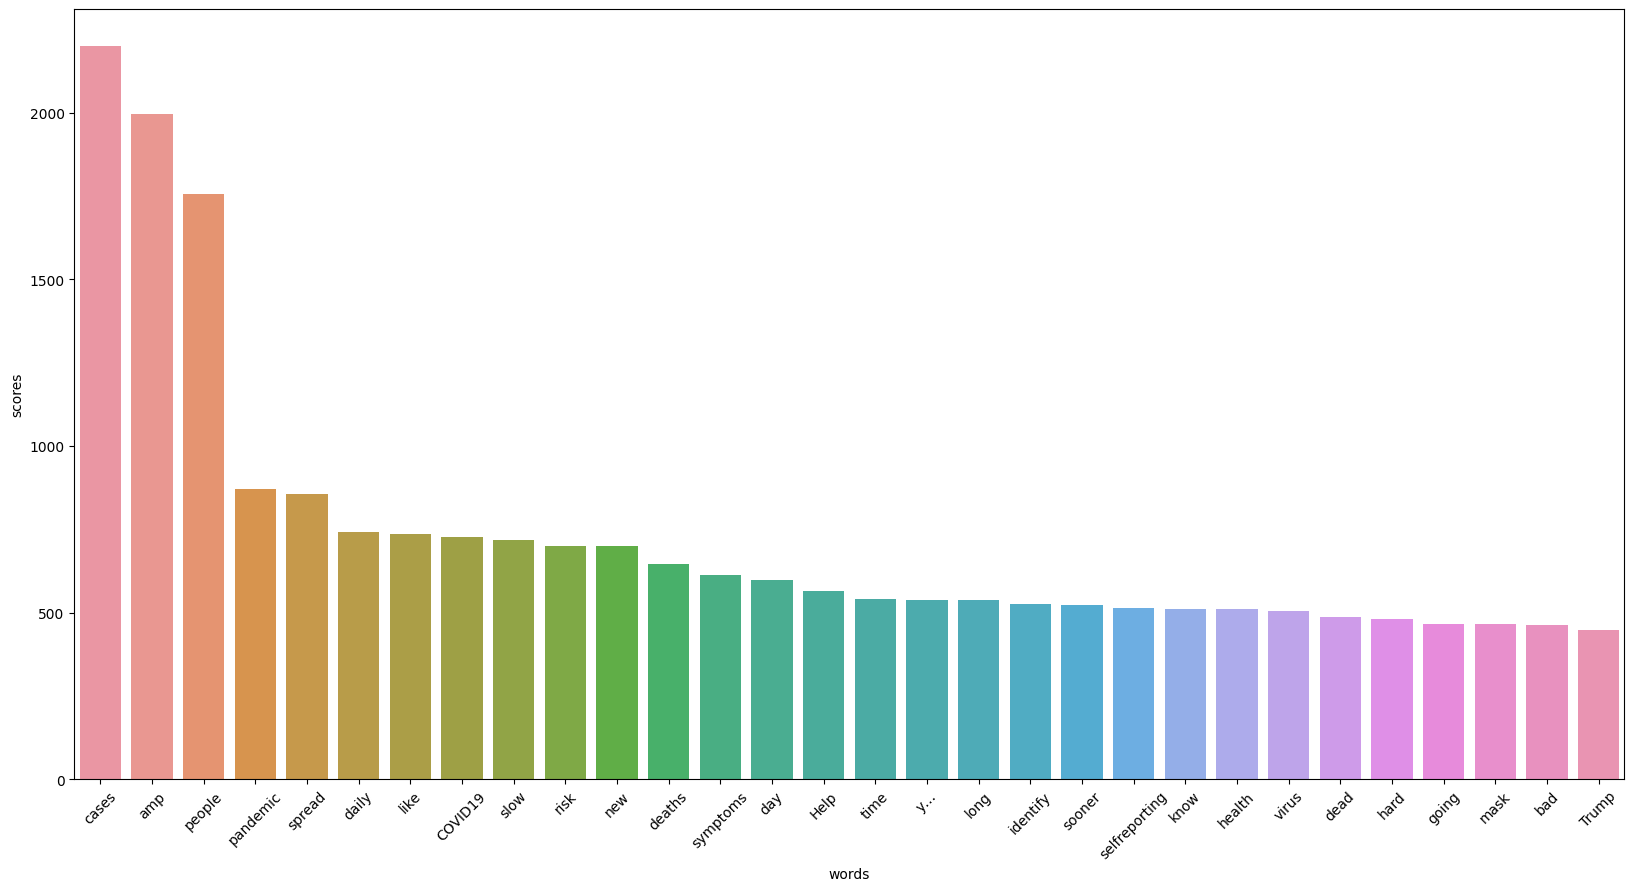

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()


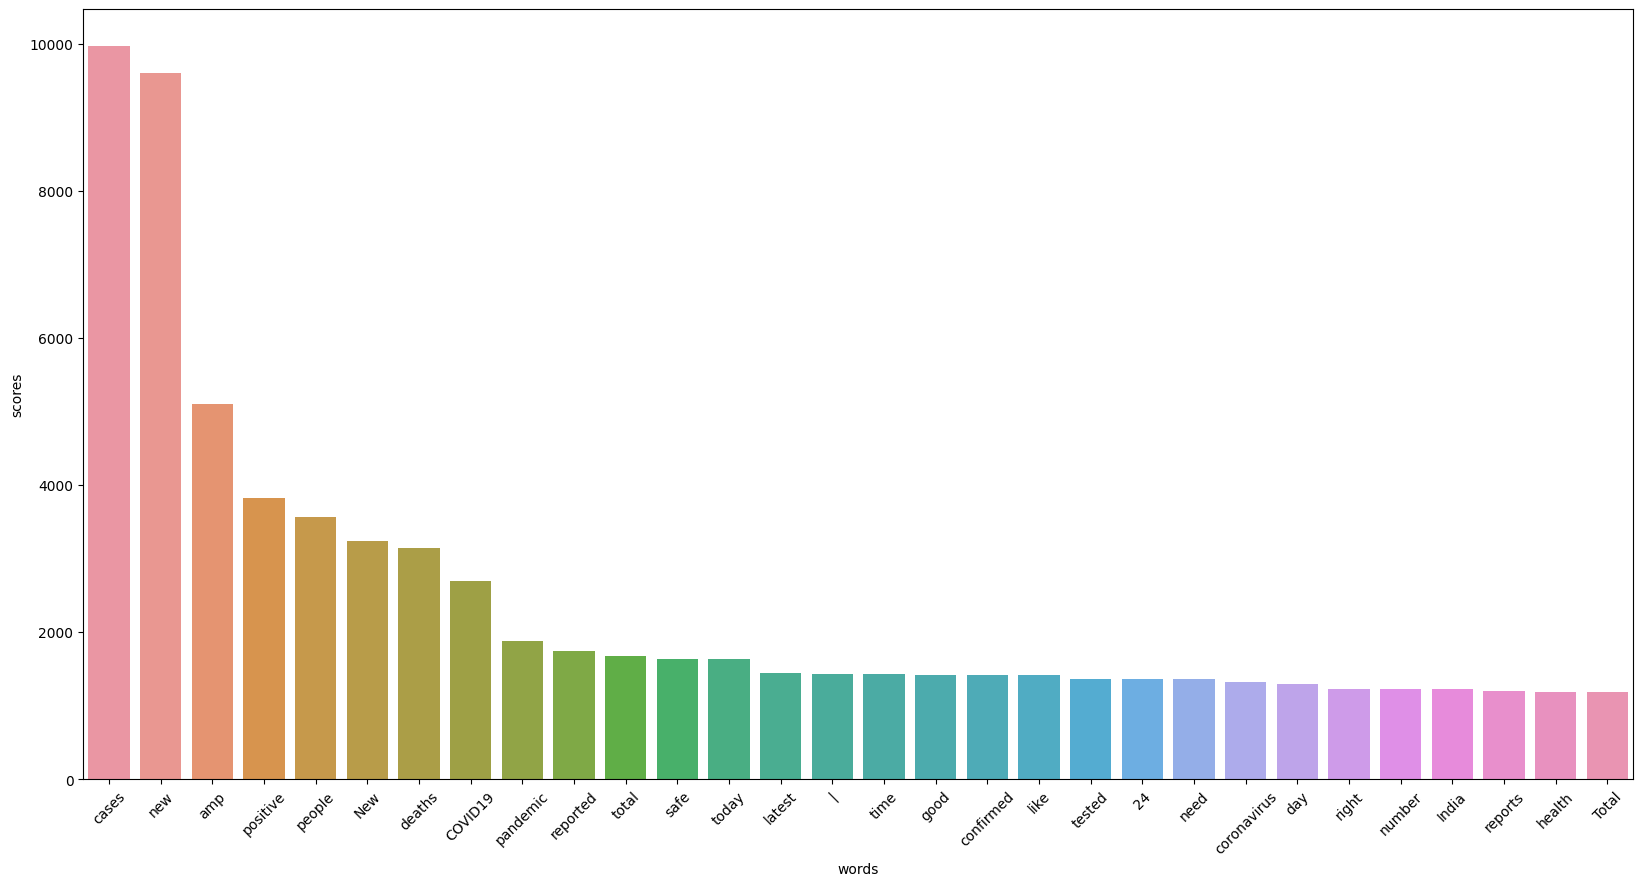

In [ ]:
# Plot with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()


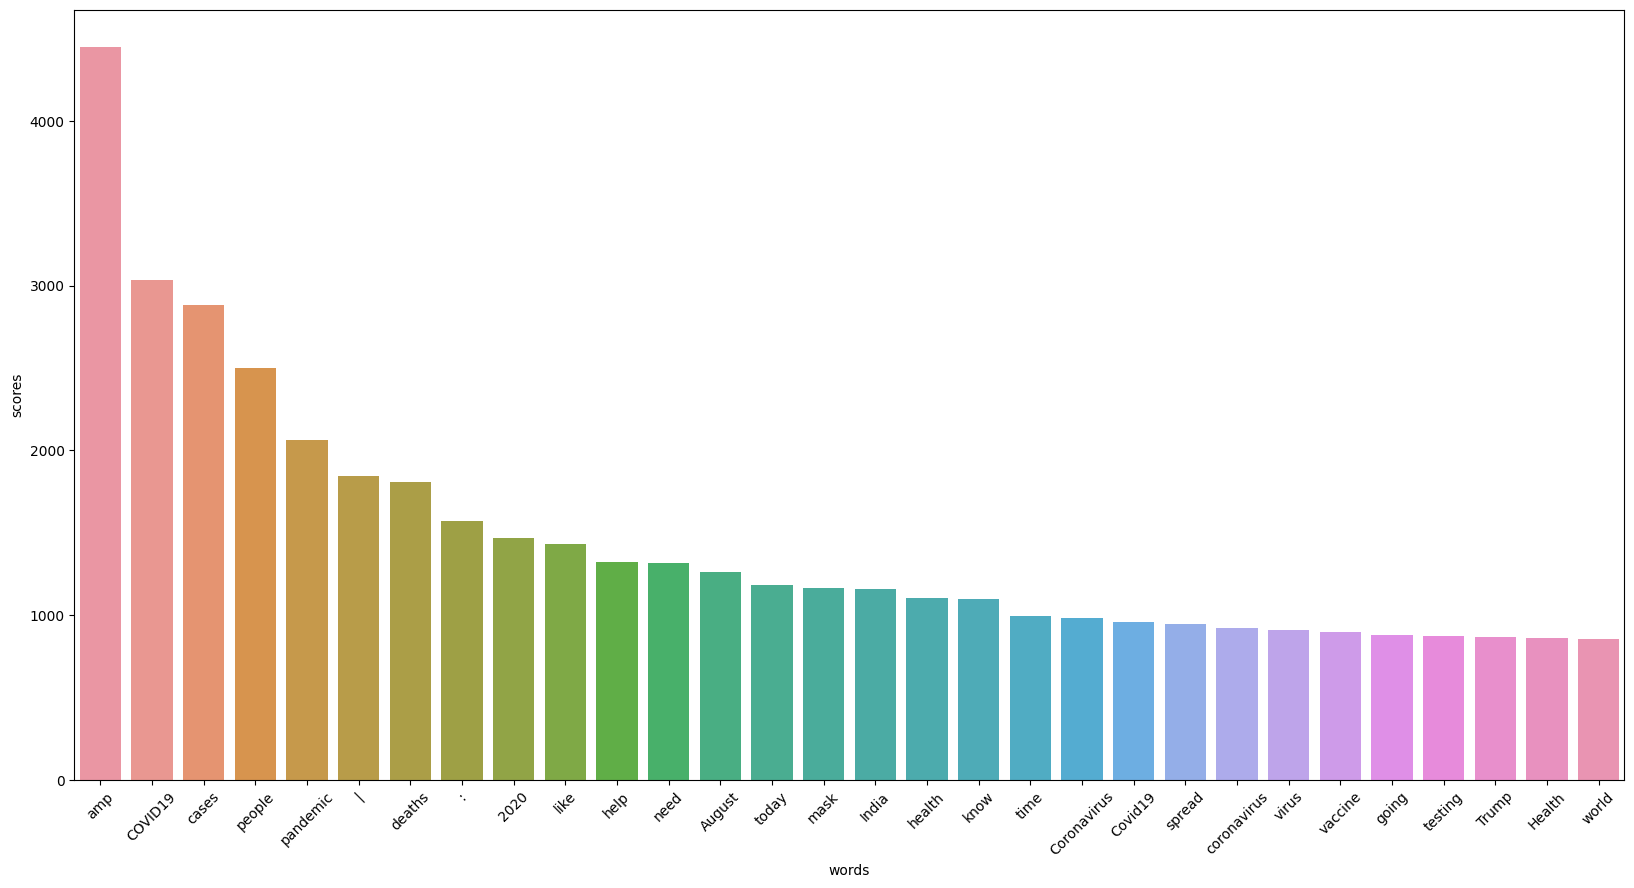

In [ ]:
# Plot with seaborn
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()


In [ ]:
### Word Cloud
from wordcloud import WordCloud

In [ ]:
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

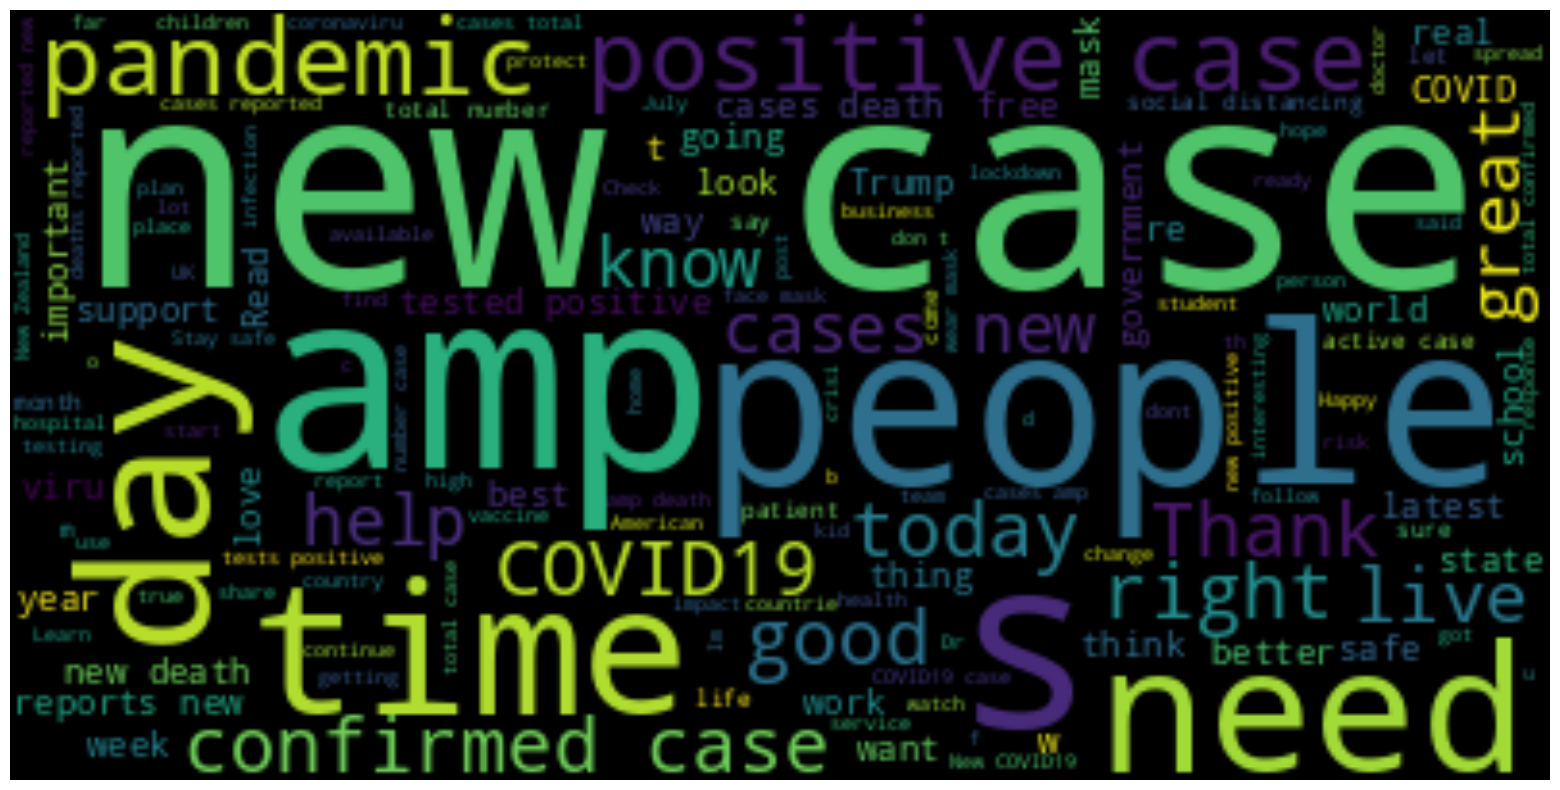

In [ ]:
plot_wordcloud(pos_docx)

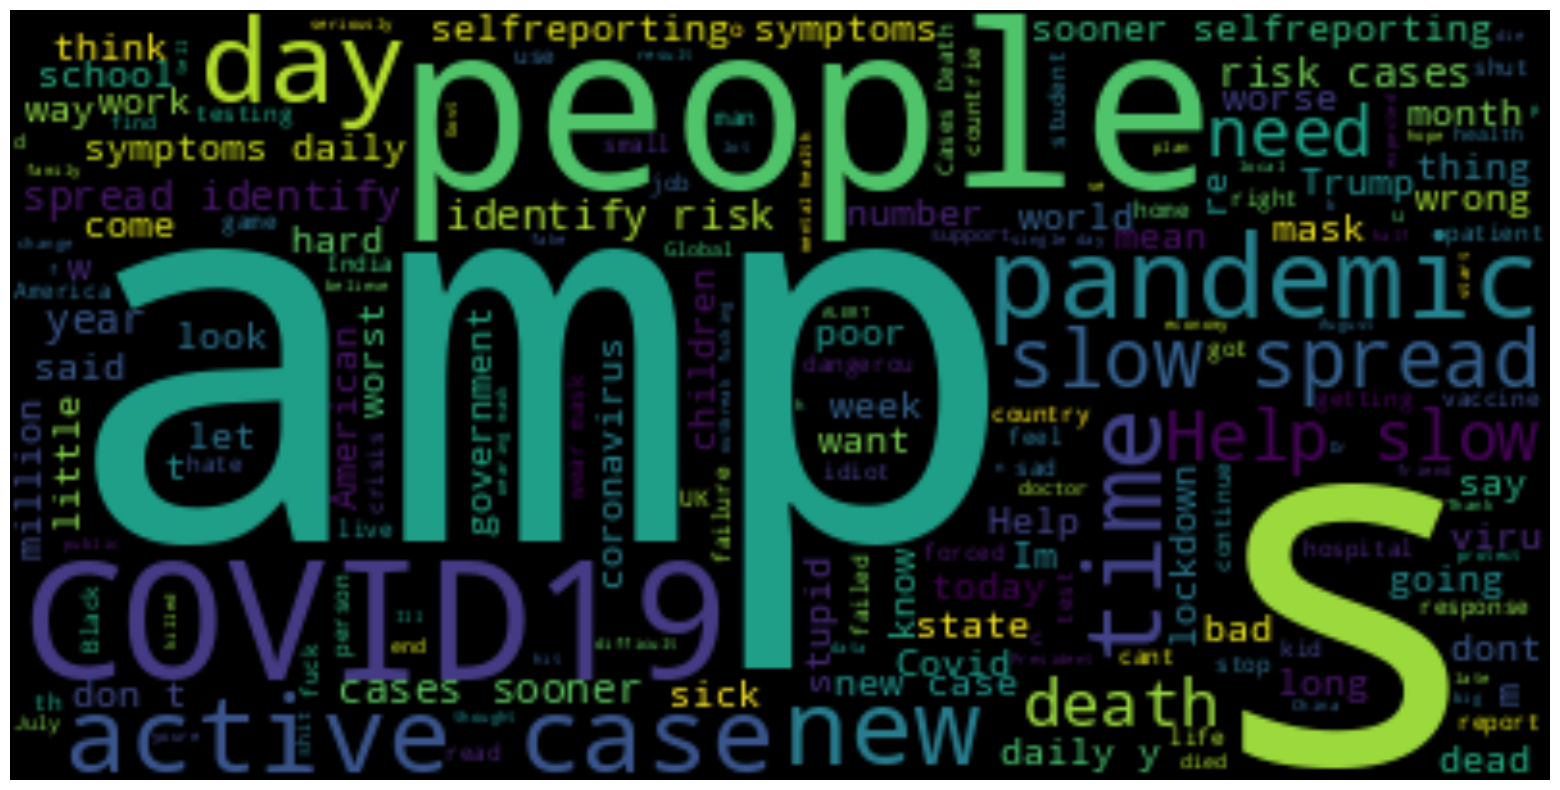

In [ ]:
plot_wordcloud(neg_docx)

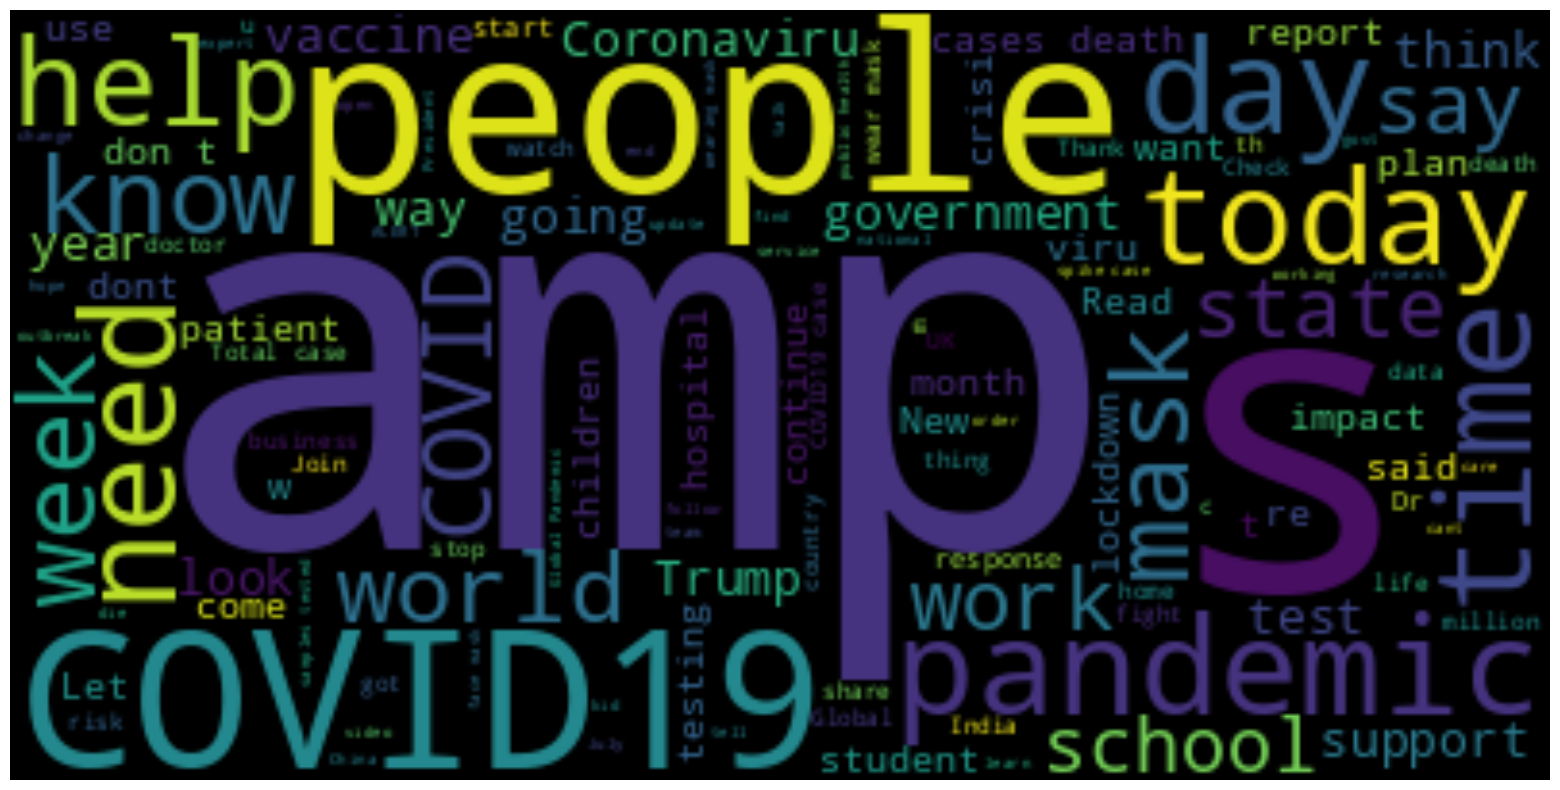

In [ ]:
plot_wordcloud(neu_docx)

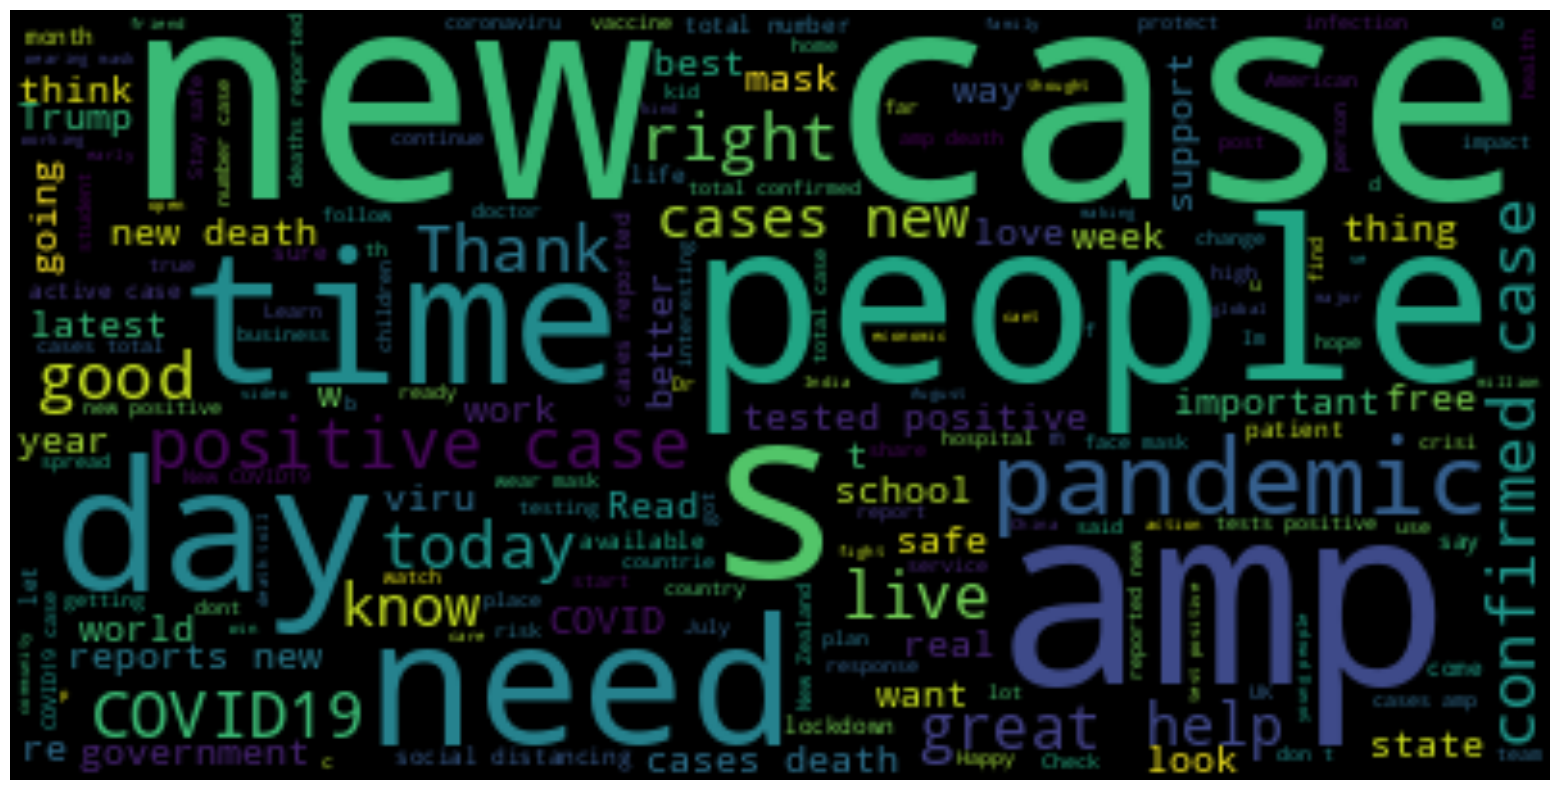

In [ ]:
plot_wordcloud(pos_docx)